In [1]:
import numpy as np;
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
make_blobs?


In [3]:
x,y = make_blobs(n_samples=500,centers=2, n_features=2,random_state=3);

In [4]:
make_blobs?

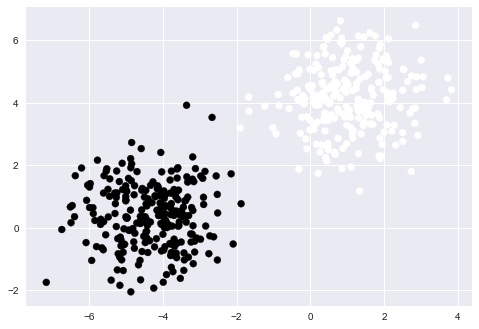

In [5]:
plt.style.use('seaborn');
plt.scatter(x[:,0],x[:,1],c=y)
plt.show();

# writing the training method and the helper function

In [6]:
def sigmoid(output):
    output= 1/(1+ np.exp(-output));
    return output;
def error(y,y_pred):
    error= -(1/x.shape[0])*np.sum((y*np.log2(y_pred)+(1-y)*np.log2(1-y_pred)));

    return error;

def display_error(error_list):
    plt.plot(error_list);
    plt.title("Reduction in error");
    plt.ylabel("Error");
    plt.xlabel("Epoch");
    plt.show();

def gradient_descent(x,y,weights ,error_list,learning_rate=0.5,num_iteration=100):
    for i in range(num_iteration):
        
        y_pred= predict(x,weights)
        
        error_list.append(error(y,y_pred));
        gradient=np.dot(x.T,(y_pred-y));
       
        m= float(x.shape[0]);
        weights= weights-(learning_rate)*gradient/(m);
        
        
   
    return weights;
    
    
def predict(x,weights):
    return sigmoid(np.dot(x,weights));
    

def train(x,y,learning_rate=0.1):
    weights= np.ones((x.shape[1]+1,1));
    y=y.reshape((-1,1));
    to_hstack=np.ones((x.shape[0],1));
    x=np.hstack((to_hstack,x));        #taking care of bias terms
    error_list=[];
    
    weights= gradient_descent(x,y,weights,error_list,learning_rate)
    display_error(error_list);
    return weights;
    



    

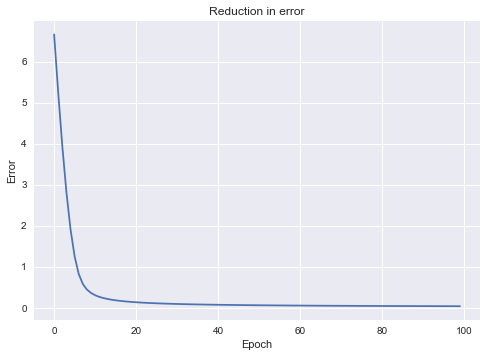

In [7]:
weights=train(x,y)



In [9]:
x_plot=np.linspace(-8,6,20);
y_plot= -(weights[0]+weights[1]*x_plot)/weights[2];

In [10]:
x_plot,y_plot

(array([-8.        , -7.26315789, -6.52631579, -5.78947368, -5.05263158,
        -4.31578947, -3.57894737, -2.84210526, -2.10526316, -1.36842105,
        -0.63157895,  0.10526316,  0.84210526,  1.57894737,  2.31578947,
         3.05263158,  3.78947368,  4.52631579,  5.26315789,  6.        ]),
 array([ 8.79142274,  8.0493355 ,  7.30724825,  6.565161  ,  5.82307376,
         5.08098651,  4.33889926,  3.59681202,  2.85472477,  2.11263752,
         1.37055028,  0.62846303, -0.11362422, -0.85571146, -1.59779871,
        -2.33988596, -3.0819732 , -3.82406045, -4.5661477 , -5.30823494]))

# Plotting Decision Surface

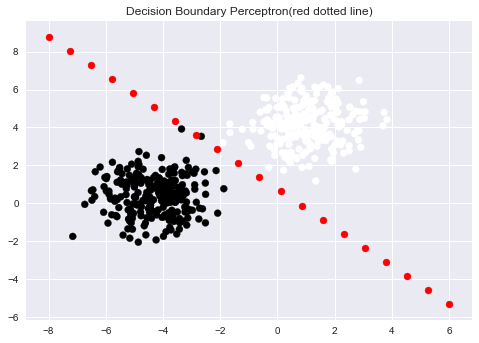

In [14]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.scatter(x_plot,y_plot,color="red");
plt.title("Decision Boundary Perceptron(red dotted line)")
plt.show();